In [1]:
import io
import requests

from fink_utils.photometry.conversion import dc_mag
from fink_utils.photometry.utils import is_source_behind

from PIL import Image as im

import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('talk')

FINK_API_URL = 'https://fink-portal.org'

In [2]:
objs_ids = ["ZTF23aagpize", "ZTF23aajfydl", "ZTF23aagvqoi", "ZTF23aaiqvoy", "ZTF20actltga", "ZTF21abwqhnf",
            "ZTF23aazvcuu", "ZTF23abndgzk", "ZTF22aarrrgb", "ZTF23abaunxi", "ZTF22aardmht", "ZTF22aapbmfp", "ZTF21abahtfi"]

# Photometry and Science postage-stamps

In [3]:
photometry = []
for id in objs_ids:
    r = requests.post(
    "https://fink-portal.org/api/v1/objects",
    json={
        "objectId": id,
        "withupperlim": "True",
    }
    )

    # Format output in a DataFrame
    photometry.append(pd.read_json(io.BytesIO(r.content)))

In [4]:
# get processed image data
cutouts = []
for id in objs_ids:
    r = requests.post(
        '{}/api/v1/cutouts'.format(FINK_API_URL),
        json={
            'objectId': id,
            'kind': 'Science',
            'stretch': 'sqrt'
        }
    )

    cutouts.append(im.open(io.BytesIO(r.content)))

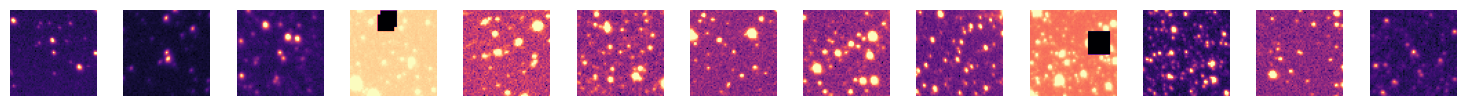

In [5]:
# number of objects
n_images = len(objs_ids)

fig, axes = plt.subplots(1, n_images, figsize=(15, 5))

for i, ax in enumerate(axes):
    if i < len(cutouts):
        ax.imshow(cutouts[i], cmap="magma")
    ax.axis('off')

    # Mostrar o gráfico
plt.tight_layout()
plt.show()

In [6]:
# number of objects
n_images = len(objs_ids)

for i in range(0, n_images):
    plt.imshow(cutouts[i], cmap="magma")
    plt.axis('off')
    plt.savefig(f"./SciencePostageStamps/{objs_ids[i]}.png");
    plt.close()

In [7]:
def plot_and_save_photometry_item(pdf_magpsf, item_index, output_dir="DifferencePSFFitMagnitude"):
    """
    Generates and saves a plot for a single photometry item.

    Parameters:
    - pdf_magpsf: DataFrame containing photometric data for a single object.
    - item_index: index or identifier of the item, used for naming the saved plot.
    - output_dir: name of the directory where the plot will be saved (default: "DifferencePSFFitMagnitude").
    """

    # Create the folder to save plots if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)

    # Adjust MJD
    mjd = pdf_magpsf["i:jd"].apply(lambda x: x - 2400000.5)

    fig = plt.figure(figsize=(15, 5))

    colordic = {1: "C0", 2: "C1"}
    filtdic = {1: "g", 2: "r"}

    for filt in np.unique(pdf_magpsf["i:fid"]):
        maskFilt = pdf_magpsf["i:fid"] == filt

        # Mask for valid data
        maskValid = pdf_magpsf["d:tag"] == "valid"
        plt.errorbar(
            pdf_magpsf[maskValid & maskFilt]["i:jd"].apply(lambda x: x - 2400000.5),
            pdf_magpsf[maskValid & maskFilt]["i:magpsf"],
            pdf_magpsf[maskValid & maskFilt]["i:sigmapsf"],
            ls="", marker="o", color=colordic[filt], label="{} band".format(filtdic[filt])
        )

        # Mask for upper limits
        maskUpper = pdf_magpsf["d:tag"] == "upperlim"
        plt.plot(
            pdf_magpsf[maskUpper & maskFilt]["i:jd"].apply(lambda x: x - 2400000.5),
            pdf_magpsf[maskUpper & maskFilt]["i:diffmaglim"],
            ls="", marker="v", color=colordic[filt], markerfacecolor="none"
        )

        # Mask for bad quality data
        maskBadquality = pdf_magpsf["d:tag"] == "badquality"
        plt.errorbar(
            pdf_magpsf[maskBadquality & maskFilt]["i:jd"].apply(lambda x: x - 2400000.5),
            pdf_magpsf[maskBadquality & maskFilt]["i:magpsf"],
            pdf_magpsf[maskBadquality & maskFilt]["i:sigmapsf"],
            ls="", marker="^", color=colordic[filt]
        )

    # Plot settings
    plt.ylim(12, 22)
    plt.gca().invert_yaxis()
    plt.legend()
    plt.title(f"Difference image PSF-fit magnitude - object {objs_ids[item_index]}")
    plt.xlabel("Modified Julian Date [UTC]")
    plt.ylabel("Difference Magnitude")

    # Save the plot as a .png file
    plot_filename = os.path.join(output_dir, f"psf_fit_magnitude_{objs_ids[item_index]}.png")
    plt.savefig(plot_filename, bbox_inches='tight')
    plt.close()  # Close the figure to avoid memory overload

    print(f"Plot {item_index} saved as {plot_filename}")

In [8]:
for i, pdf_magpsf in enumerate(photometry):
    plot_and_save_photometry_item(pdf_magpsf, i)

Plot 0 saved as DifferencePSFFitMagnitude/psf_fit_magnitude_ZTF23aagpize.png
Plot 1 saved as DifferencePSFFitMagnitude/psf_fit_magnitude_ZTF23aajfydl.png
Plot 2 saved as DifferencePSFFitMagnitude/psf_fit_magnitude_ZTF23aagvqoi.png
Plot 3 saved as DifferencePSFFitMagnitude/psf_fit_magnitude_ZTF23aaiqvoy.png
Plot 4 saved as DifferencePSFFitMagnitude/psf_fit_magnitude_ZTF20actltga.png
Plot 5 saved as DifferencePSFFitMagnitude/psf_fit_magnitude_ZTF21abwqhnf.png
Plot 6 saved as DifferencePSFFitMagnitude/psf_fit_magnitude_ZTF23aazvcuu.png
Plot 7 saved as DifferencePSFFitMagnitude/psf_fit_magnitude_ZTF23abndgzk.png
Plot 8 saved as DifferencePSFFitMagnitude/psf_fit_magnitude_ZTF22aarrrgb.png
Plot 9 saved as DifferencePSFFitMagnitude/psf_fit_magnitude_ZTF23abaunxi.png
Plot 10 saved as DifferencePSFFitMagnitude/psf_fit_magnitude_ZTF22aardmht.png
Plot 11 saved as DifferencePSFFitMagnitude/psf_fit_magnitude_ZTF22aapbmfp.png
Plot 12 saved as DifferencePSFFitMagnitude/psf_fit_magnitude_ZTF21abahtfi.

# DC magnitude

In [9]:
def process_photometry_item(pdf_magpsf):
    """
    Processes each photometry item to check if a source is detected behind.
    If detected, computes the DC magnitude, otherwise uses PSF fit magnitude.
    
    Parameters:
    - pdf_magpsf: DataFrame containing photometric data for a single object.
    
    Returns:
    - pdf_magpsf_valid: DataFrame with computed magnitudes (DC or PSF fit).
    """
    
    # Filter valid measurements and sort by time in descending order
    pdf_magpsf_valid = pdf_magpsf[pdf_magpsf['d:tag'] == 'valid'].sort_values('i:jd', ascending=False)

    # Check if there is a source behind
    isSource = is_source_behind(pdf_magpsf_valid['i:distnr'].values[0])

    if isSource:
        print("It looks like there is a source behind. Let's compute the DC magnitude instead.")

        # Compute DC magnitude
        mag_dc, err_dc = np.transpose([
            dc_mag(*args) for args in zip(
                pdf_magpsf_valid['i:magpsf'].astype(float).values,
                pdf_magpsf_valid['i:sigmapsf'].astype(float).values,
                pdf_magpsf_valid['i:magnr'].astype(float).values,
                pdf_magpsf_valid['i:sigmagnr'].astype(float).values,
                pdf_magpsf_valid['i:isdiffpos'].values
            )
        ])
        
        # Store the DC magnitude and error in the DataFrame
        pdf_magpsf_valid['i:mag_dc'] = mag_dc
        pdf_magpsf_valid['i:err_dc'] = err_dc
    else:
        print("No source found -- keeping PSF fit magnitude.")
        
        # Keep the PSF fit magnitude
        pdf_magpsf_valid['i:mag_dc'] = pdf_magpsf_valid['i:magpsf']
        pdf_magpsf_valid['i:err_dc'] = pdf_magpsf_valid['i:sigmapsf']
    
    return pdf_magpsf_valid


In [10]:
photometry_dc = []
for i, pdf_magpsf in enumerate(photometry):
    processed_item = process_photometry_item(pdf_magpsf)
    photometry_dc.append(processed_item)


It looks like there is a source behind. Let's compute the DC magnitude instead.
It looks like there is a source behind. Let's compute the DC magnitude instead.
It looks like there is a source behind. Let's compute the DC magnitude instead.
No source found -- keeping PSF fit magnitude.
It looks like there is a source behind. Let's compute the DC magnitude instead.
It looks like there is a source behind. Let's compute the DC magnitude instead.
It looks like there is a source behind. Let's compute the DC magnitude instead.
No source found -- keeping PSF fit magnitude.
It looks like there is a source behind. Let's compute the DC magnitude instead.
It looks like there is a source behind. Let's compute the DC magnitude instead.
It looks like there is a source behind. Let's compute the DC magnitude instead.
It looks like there is a source behind. Let's compute the DC magnitude instead.
It looks like there is a source behind. Let's compute the DC magnitude instead.


In [11]:
len(photometry_dc)

13

In [20]:
def plot_psf_vs_dc(pdf_magpsf_valid, object_id):
    """
    Plots PSF-fit and DC magnitudes for g-band and r-band for objects where
    a source behind has been detected.
    
    Parameters:
    - pdf_magpsf_valid: DataFrame with valid photometry data and computed DC magnitudes
    - object_id: String or ID of the object for the plot title
    
    Saves the plot to a file.
    """
    
    fig = plt.figure(figsize=(15, 5))
    
    # Color dictionary for g and r bands
    colordic = {1: 'C0', 2: 'C1'}
    filtdic = {1: 'g', 2: 'r'}
    
    # Loop through filters (g-band: 1, r-band: 2)
    for filt in np.unique(pdf_magpsf_valid['i:fid']):
        maskFilt = pdf_magpsf_valid['i:fid'] == filt

        # Plot PSF-fit magnitudes
        plt.errorbar(
            pdf_magpsf_valid[maskFilt]['i:jd'].apply(lambda x: x - 2400000.5),
            pdf_magpsf_valid[maskFilt]['i:magpsf'],
            pdf_magpsf_valid[maskFilt]['i:sigmapsf'],
            ls='', marker='x', color=colordic[filt], 
            label='{} band (PSF-fit)'.format(filtdic[filt]),
        )
        
        # Plot DC magnitudes
        plt.errorbar(
            pdf_magpsf_valid[maskFilt]['i:jd'].apply(lambda x: x - 2400000.5),
            pdf_magpsf_valid[maskFilt]['i:mag_dc'],
            pdf_magpsf_valid[maskFilt]['i:err_dc'],
            ls='', marker='o', color=colordic[filt], 
            label='{} band (DC)'.format(filtdic[filt]),
        )
    
    # Reverse the y-axis to show magnitude correctly
    plt.gca().invert_yaxis()
    
    # Add legend and labels
    plt.legend()
    plt.title(f'Comparison of PSF-fit and DC magnitudes - object {objs_ids[object_id]}')
    plt.xlabel('Modified Julian Date [UTC]')
    plt.ylabel('Magnitude')
    
    # Save the plot
    plt.savefig(f'PSFVSDC/comparison_psf_vs_dc_{objs_ids[object_id]}.png', bbox_inches='tight')
    plt.close()

In [21]:
# Example usage:
for i, pdf_magpsf in enumerate(photometry):
    # Process each item and check if source is behind
    processed_item = process_photometry_item(pdf_magpsf)
    
    # If a source was detected behind, plot and save the comparison
    if is_source_behind(processed_item['i:distnr'].values[0]):
        plot_psf_vs_dc(processed_item, i)

It looks like there is a source behind. Let's compute the DC magnitude instead.
It looks like there is a source behind. Let's compute the DC magnitude instead.
It looks like there is a source behind. Let's compute the DC magnitude instead.
No source found -- keeping PSF fit magnitude.
It looks like there is a source behind. Let's compute the DC magnitude instead.
It looks like there is a source behind. Let's compute the DC magnitude instead.
It looks like there is a source behind. Let's compute the DC magnitude instead.
No source found -- keeping PSF fit magnitude.
It looks like there is a source behind. Let's compute the DC magnitude instead.
It looks like there is a source behind. Let's compute the DC magnitude instead.
It looks like there is a source behind. Let's compute the DC magnitude instead.
It looks like there is a source behind. Let's compute the DC magnitude instead.
It looks like there is a source behind. Let's compute the DC magnitude instead.


# ZTF release date

In [60]:
def get_ZTF_data_release(pdf_magpsf_valid):
    """
    Get ZTF release date
    
    Parameters:
    - pdf_magpsf_valid: DataFrame with valid photometry data and computed DC magnitudes
    
    Returns a Pandas DataFrame object.
    """
    ra0 = np.nanmean(pdf_magpsf_valid['i:ra'].values)
    dec0 = np.nanmean(pdf_magpsf_valid['i:dec'].values)
    
    r = requests.post(
        'https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves', 
        data={'POS': 'CIRCLE {} {} 0.0004'.format(ra0, dec0), 
            'BAD_CATFLAGS_MASK': 32768, 
            'FORMAT': 'csv'
            }
    )

    return pd.read_csv(io.StringIO(r.text))

In [61]:
photometry_ZTF = []
for i in range(0, len(photometry)):
    ztf_data = get_ZTF_data_release(photometry[i])
    photometry_ZTF.append(ztf_data)

271.16263513906244 9.465193121875
277.113416316129 6.118781309677419
281.7595285720931 -8.560708830232558
282.5407203428571 5.641619857142857
311.5258548714286 46.163117271428575
287.9446238888889 14.000685333333333
324.86585705 55.361202070000004
311.37493083333334 36.424471677777774
299.7650125526316 18.556844963157896
285.9543835090909 -1.0496986909090908
287.42472547187504 3.27690745
261.0210769913043 -11.592456560869564
263.42614081794875 -20.86805894358974


In [72]:
def plot_dc_vs_ztf(pdf_magpsf_valid, pdf_ZTF, object_id, dc=""):
    """
    Plots DC magnitudes from alert vs ZTF photometry.
    
    Parameters:
    - pdf_magpsf_valid: DataFrame with valid photometry data and computed DC magnitudes
    - pdf_ZTF: DataFrame with ZTF photometry data
    
    Saves the plot to a file.
    """
    
    fig = plt.figure(figsize=(15, 6))

    # Color and filter dictionaries for DC magnitudes
    colordic = {1: 'C0', 2: 'C1'}
    filtdic = {1: 'g', 2: 'r'}

    # Plot DC magnitudes from alert
    for filt in np.unique(pdf_magpsf_valid['i:fid']):
        maskFilt = pdf_magpsf_valid['i:fid'] == filt
        
        plt.errorbar(
            pdf_magpsf_valid[maskFilt]['i:jd'].apply(lambda x: x - 2400000.5),
            pdf_magpsf_valid[maskFilt]['i:mag_dc'],
            pdf_magpsf_valid[maskFilt]['i:err_dc'],
            ls='', marker='o', 
            color=colordic[filt], 
            label=f'{filtdic[filt]} band {dc}',
        )

    # Filter ZTF data where catflags is 0
    f = pdf_ZTF['catflags'] == 0
    colordic = {'zg': 'C0', 'zr': 'C1', 'zi': 'C2'}

    # Plot ZTF photometry
    for filt in np.unique(pdf_ZTF[f]['filtercode']):
        maskFilt = pdf_ZTF[f]['filtercode'] == filt
        plt.errorbar(
            pdf_ZTF[f][maskFilt]['mjd'], 
            pdf_ZTF[f][maskFilt]['mag'], 
            pdf_ZTF[f][maskFilt]['magerr'], 
            ls='', color=colordic[filt],
            label='ZTF DR {} band'.format(filt)
        )

    # Formatting the plots
    plt.gca().invert_yaxis()
    plt.legend(ncol=3)
    plt.title(f'DC mag from alert vs ZTF DR photometry - object {objs_ids[object_id]}')
    plt.xlabel('Modified Julian Date [UTC]')
    plt.ylabel('Magnitude')

    # Save the plot
    plt.savefig(f'FinkVSZTF/DC_vs_ZTF_photometry_{objs_ids[object_id]}.png', bbox_inches='tight')
    plt.close()

In [73]:
for i, pdf_magpsf in enumerate(photometry):
    # Process each item and check if source is behind
    processed_item = process_photometry_item(pdf_magpsf)
    
    # If a source was detected behind, plot DC vs ZTF
    if is_source_behind(processed_item['i:distnr'].values[0]):
        plot_dc_vs_ztf(processed_item, photometry_ZTF[i], i, dc="(DC)")
    else:
        plot_dc_vs_ztf(processed_item, photometry_ZTF[i], i, dc="")

It looks like there is a source behind. Let's compute the DC magnitude instead.
It looks like there is a source behind. Let's compute the DC magnitude instead.
It looks like there is a source behind. Let's compute the DC magnitude instead.
No source found -- keeping PSF fit magnitude.
It looks like there is a source behind. Let's compute the DC magnitude instead.
It looks like there is a source behind. Let's compute the DC magnitude instead.
It looks like there is a source behind. Let's compute the DC magnitude instead.
No source found -- keeping PSF fit magnitude.
It looks like there is a source behind. Let's compute the DC magnitude instead.
It looks like there is a source behind. Let's compute the DC magnitude instead.
It looks like there is a source behind. Let's compute the DC magnitude instead.
It looks like there is a source behind. Let's compute the DC magnitude instead.
It looks like there is a source behind. Let's compute the DC magnitude instead.


In [75]:
# Crie a pasta DFExports se ela não existir
output_dir = "DFExports"
os.makedirs(output_dir, exist_ok=True)

# Exportar os DataFrames da lista photometry
for i, df in enumerate(photometry):
    df.to_pickle(os.path.join(output_dir, f"[FINK]photometry_{objs_ids[i]}.pkl"))

# Exportar os DataFrames da lista photometry_ZTF
for i, df in enumerate(photometry_ZTF):
    df.to_pickle(os.path.join(output_dir, f"[ZTF]photometry_{objs_ids[i]}.pkl"))

print("DataFrames exported successfully.")

DataFrames exported successfully.
